## Qs

1. is reducing comlumns OK when doing randomForest and boosting? (with drop_first=True)
2. confusion matrix before or after SMOT and imputation?
3. can i present models more than regression?

# **Customer Churn Prediction**

**Table of Content:**

1. [Setup](#setup)

2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)

3. [Data Encoding & Imputation](#data-encoding--imputation)

4. [Correlation Analysis](#correlation-analysis)

5. [Handling Imbalanced Data & Scaling](#handling-imbalanced-data--scaling)

6. [Regression Models](#regression-models)

    - [Linear Regression](#linear-regression)

    - [Quadratic Regression](#quadratic-regression)
    
    - [Logistic Regression](#logistic-regression)

## Setup

1. **importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score

In [2]:
warnings.filterwarnings('ignore')

2. **Importing the data**

In [3]:
df = pd.read_excel('data.xlsx', sheet_name='E Comm')
desc = pd.read_excel('data.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3]).drop(columns="Data")

3. **Description of the data columns**

In [4]:
desc

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


4. **Peaking the data**

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Exploratory Data Analysis (EDA)

1. **Analyzing the type of data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Seems like all the data are in appropriate format, no need to change the data type.

2. **Dropping `customerID` column**

We'll drop the `customerID` column as it is not useful for our analysis, nor is a feature for churn prediction.

In [7]:
df.drop(columns="CustomerID", inplace=True)

3. **Lets get the count of some interesting variables, to get an idea of what the data represents.**

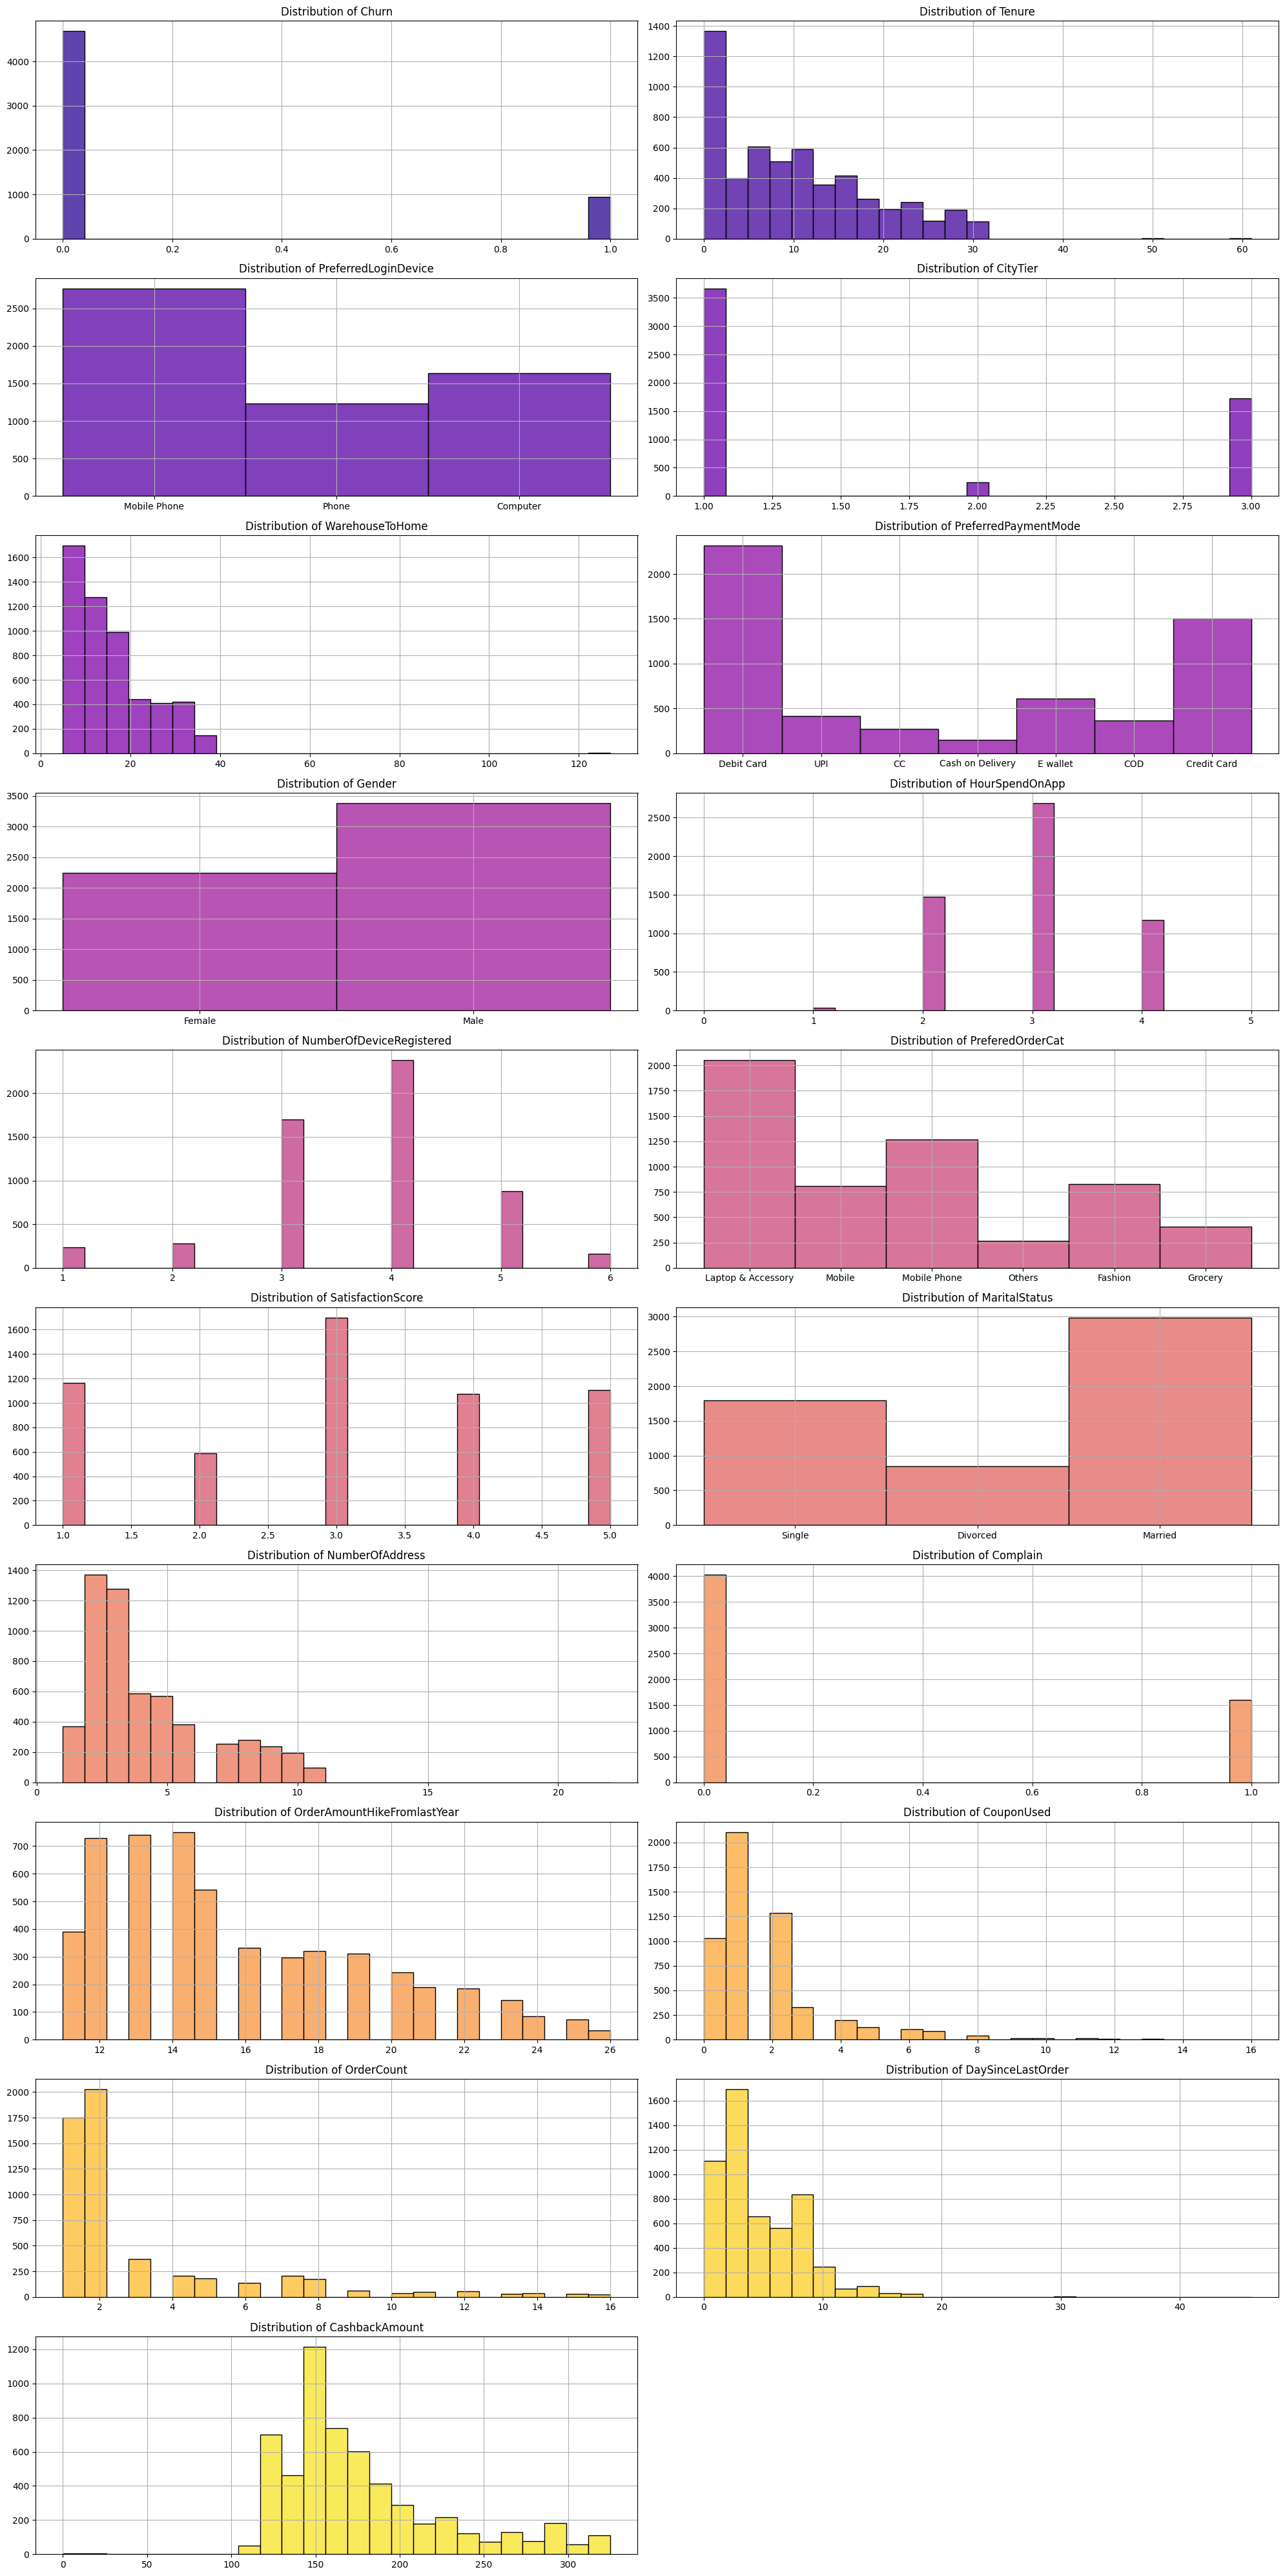

In [8]:
plt.figure(figsize=(20,40))
n = 1
colors = sns.color_palette("plasma", len(df.columns))
for i, col in enumerate(df.columns):
    plt.subplot(10,2,n)
    sns.histplot(df, x=col, bins=25, color=colors[i])
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")
    plt.grid(True)
    n += 1
    plt.tight_layout()

plt.show()

Here are a couple of important things these visualizations tell us:

- 

## Data Encoding & Imputation

1. **Checking for missing values**

In [9]:
print(f'Count of missing values in each column:\n\n{df.isnull().sum()}\n---')
print(f'Total missing: {df.isnull().sum().sum()}')
print(f'Total rows missing (at least one): {df[df.isnull().any(axis=1)].shape[0]}')
print(f'Percentage of missing values in db: {df.isnull().sum().sum() / df.shape[0] * 100:.2f}%')

Count of missing values in each column:

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
---
Total missing: 1856
Total rows missing (at least one): 1856
Percentage of missing values in db: 32.97%


So we cant drop.

2. **Imputing missing values for numeric columns**

In [10]:
numerics = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numerics] = SimpleImputer(strategy='mean').fit_transform(df[numerics])

3. **Encoding categorical columns (One-Hot Encoding)**

In [11]:
categoricals = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categoricals, drop_first=True)

4. **Imputing missing values for categorical columns**

In [12]:
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=250), max_iter=10)
df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)

5. **Displaying the imputed and encoded data**

In [13]:
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Correlation Analysis

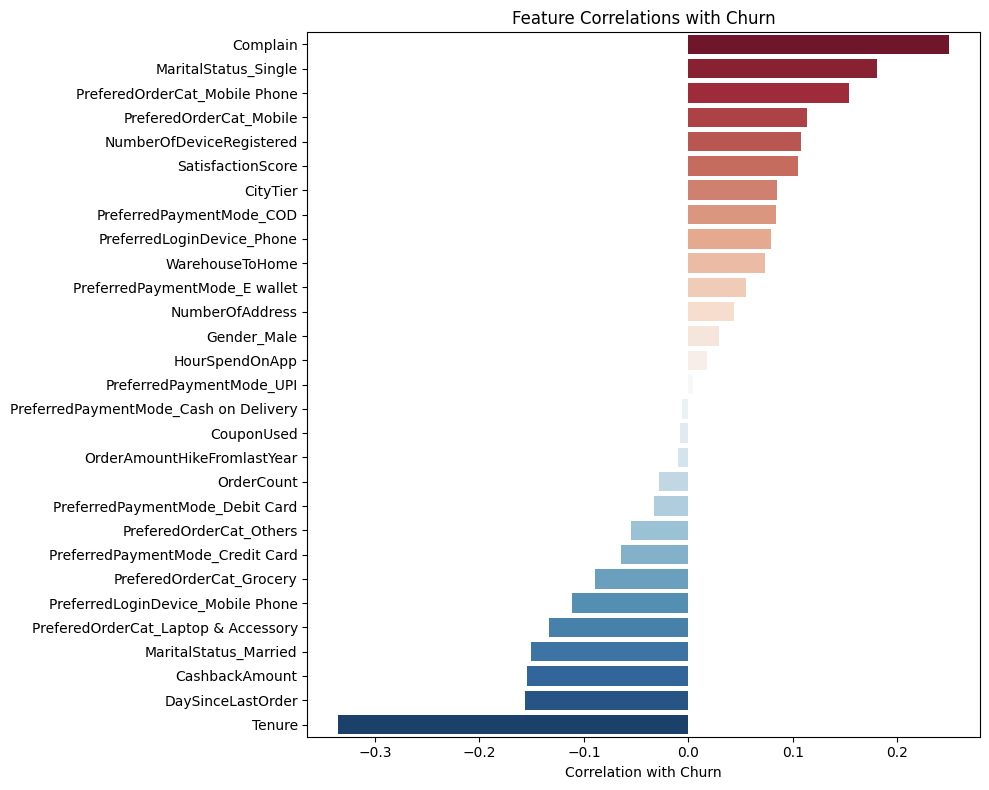

In [14]:
# corrolations with churn sorted
churn_corr = df.corr()["Churn"].sort_values(ascending=False)
# dropping churn because it will always be 1
churn_corr = churn_corr.drop("Churn")

plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="RdBu")

plt.xlabel("Correlation with Churn")
plt.ylabel("")
plt.title("Feature Correlations with Churn")
plt.tight_layout()
plt.show()


## Splitting Data

1. **Specifying the target variable (`y`) and the features (`X`)**

In [15]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

2. **Splitting the data into training and testing sets**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=250, stratify=y)

print(f"Training set's shape: {X_train.shape}")
print(f"Testing set's shape: {X_test.shape}")

Training set's shape: (4504, 29)
Testing set's shape: (1126, 29)


## Handling Imbalanced Data & Scaling

1. **Evaluating the imbalance of `Churn`**

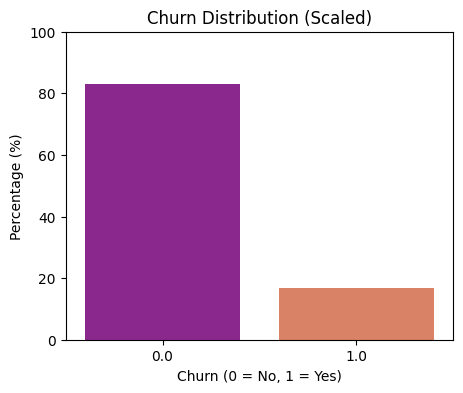

In [17]:
plt.figure(figsize=(5,4))

churn_percentages = df["Churn"].value_counts(normalize=True) * 100
ax = sns.barplot(x=churn_percentages.index, y=churn_percentages.values, palette="plasma")

plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.title("Churn Distribution (Scaled)")
plt.ylim(0, 100)
plt.show()

2. **Handling the imbalance**

In [18]:
smote = SMOTE(random_state=250)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before upsampling:")
print('count of Churn = 0: {}'.format(sum(y_train==0)))
print('count of Churn = 1: {}'.format(sum(y_train==1)))
print(f"Training set's shape: {X_train.shape}\n")

print('After upsampling')
print('count of Churn = 0: {}'.format(sum(y_train_resampled==0)))
print('count of Churn = 1: {}'.format(sum(y_train_resampled==1)))
print(f"Training set's shape: {X_train_resampled.shape}")

Before upsampling:
count of Churn = 0: 3746
count of Churn = 1: 758
Training set's shape: (4504, 29)

After upsampling
count of Churn = 0: 3746
count of Churn = 1: 3746
Training set's shape: (7492, 29)


3. **Scaling the data**

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Regression Models

### **Linear Regression**

$$
y = \beta X + \epsilon
$$

1. **Performing Linear Regression**

In [22]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train_resampled)
y_pred_linear = model_linear.predict(X_test_scaled)

2. **Visualizing the model**

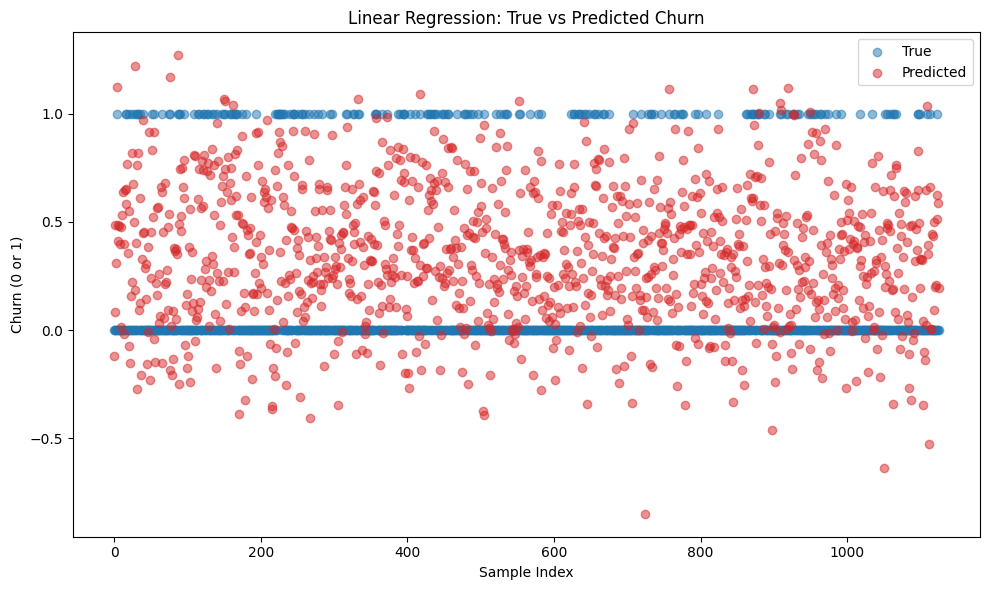

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
plt.scatter(range(len(y_pred_linear)), y_pred_linear, color='tab:red', label='Predicted', alpha=0.5)
plt.title("Linear Regression: True vs Predicted Churn")
plt.xlabel("Sample Index")
plt.ylabel("Churn (0 or 1)")
plt.legend()
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [41]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Error Metrics: \n\nMSE: {mse_linear:.4f} \nR²: {r2_linear:.4f}")

Error Metrics: 

MSE: 0.1434 
R²: -0.0224


### **Quadratic Regression**


$$
y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon
$$

1. **Claculating $X^2$**

In [42]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

2. **Performing Quadratic Regression**

In [43]:
model_quadratic = LinearRegression()
model_quadratic.fit(X_train_poly, y_train_resampled)
y_pred_quadratic = model_quadratic.predict(X_test_poly)

3. **Visualizing the model**

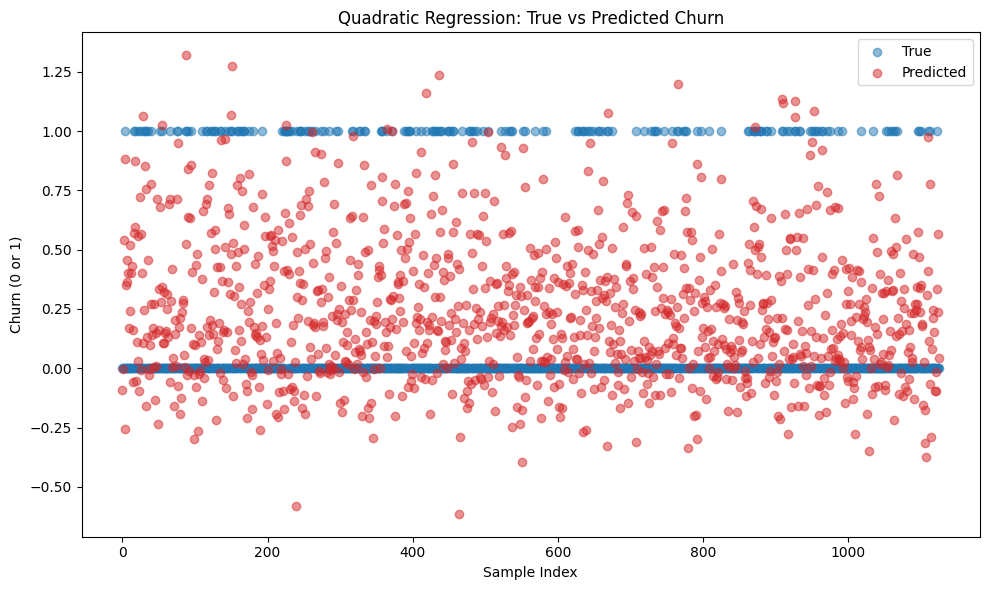

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
plt.scatter(range(len(y_pred_quadratic)), y_pred_quadratic, color='tab:red', label='Predicted', alpha=0.5)
plt.title("Quadratic Regression: True vs Predicted Churn")
plt.xlabel("Sample Index")
plt.ylabel("Churn (0 or 1)")
plt.legend()
plt.tight_layout()
plt.show()

4. **Evaluating Error**

In [49]:
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)
r2_quadratic = r2_score(y_test, y_pred_quadratic)

print(f"Error Metrics: \n\nMSE: {mse_quadratic:.4f} \nR²: {r2_quadratic:.4f}")

Error Metrics: 

MSE: 0.0924 
R²: 0.3410


### **Logistic Regression**

Logistic:

$$
\log(\frac{p}{1-p}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
$$

Probability:

$$
p = \frac{1}{1 + e^{-\sum_{i=1}^{n} \beta_i X_i}}
$$

1. **Performing Logistic Regression**

In [50]:
model_logistic = LogisticRegression(random_state=250, max_iter=1000)
model_logistic.fit(X_train_scaled, y_train_resampled)

y_pred_logistic = model_logistic.predict(X_test_scaled)
y_pred_proba = model_logistic.predict_proba(X_test_scaled)[:, 1]

2. **Visualizing the model**

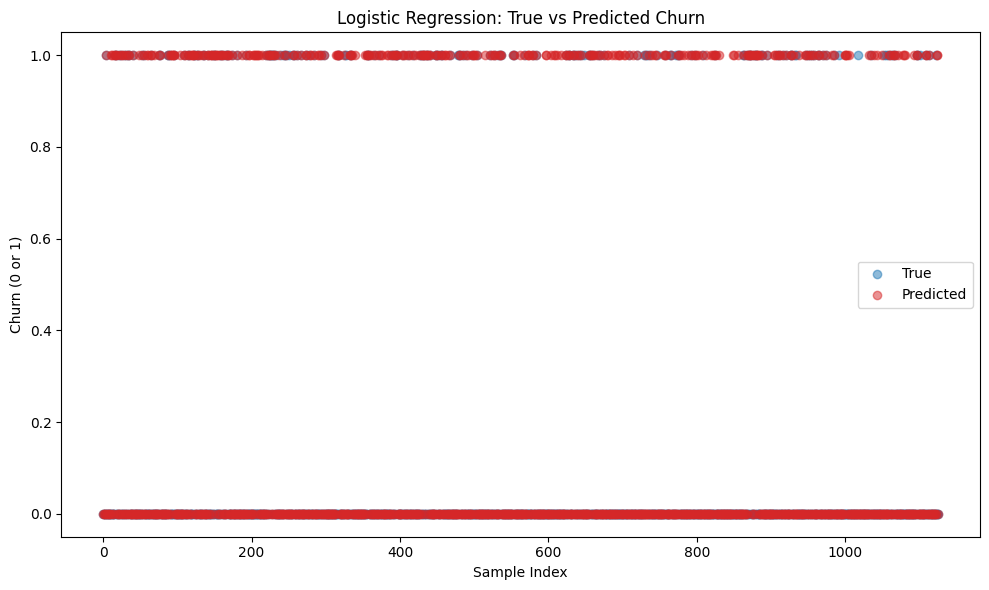

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='tab:blue', label='True', alpha=0.5)
plt.scatter(range(len(y_pred_logistic)), y_pred_logistic, color='tab:red', label='Predicted', alpha=0.5)
plt.title("Logistic Regression: True vs Predicted Churn")
plt.xlabel("Sample Index")
plt.ylabel("Churn (0 or 1)")
plt.legend()
plt.tight_layout()
plt.show()

3. **Evaluating Error**

In [71]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
roc_auc = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred_logistic)

print(f"Logistic Regression - Accuracy: {accuracy_logistic:.4f}, ROC-AUC: {roc_auc:.4f}")
print("Classification Report:\n", class_report)

Logistic Regression - Accuracy: 0.8188, ROC-AUC: 0.8975
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       936
         1.0       0.48      0.81      0.60       190

    accuracy                           0.82      1126
   macro avg       0.72      0.82      0.74      1126
weighted avg       0.87      0.82      0.84      1126

